<a href="https://colab.research.google.com/github/subhashpolisetti/Clustering-Techniques-and-Embeddings/blob/main/9_Anomaly_Detection_in_Time_Series_Univariate_%26_Multivariate_with_PyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection in Time Series Data (Univariate and Multivariate)

In this notebook, we demonstrate how to perform anomaly detection on both univariate (single feature) and multivariate (multiple features) time series data using popular machine learning models. We use the **PyOD** library for anomaly detection and visualize the results using `matplotlib`.

### Steps covered:
1. **Univariate Anomaly Detection**:
   - **Isolation Forest (IForest)**: A model designed to identify anomalies in a single-dimensional time series.
   - **Synthetic Data Generation**: We create time series data with seasonal patterns and artificial anomalies inserted.
   - **Anomaly Detection**: The `IForest` model detects anomalies based on a contamination factor, i.e., the expected percentage of outliers.
   - **Visualization**: The anomalies are plotted on top of the original time series data to identify detected outliers.

2. **Multivariate Anomaly Detection**:
   - **K-Nearest Neighbors (KNN)**: A model that detects anomalies by finding data points that are far from their neighbors in a multi-dimensional space.
   - **Synthetic Data Generation**: We generate multivariate data and artificially insert outliers.
   - **Feature Scaling**: Features are scaled using `StandardScaler` for better performance in anomaly detection.
   - **Anomaly Detection**: The `KNN` model identifies anomalies by analyzing distances in the feature space.
   - **Visualization**: The multivariate anomalies are visualized in a 2D feature space (first two features) for easy interpretation.

### Code Walkthrough:
- **`detect_univariate_anomalies`**: Detects anomalies in a univariate time series data using the Isolation Forest algorithm.
- **`detect_multivariate_anomalies`**: Detects anomalies in multivariate data using the K-Nearest Neighbors algorithm.
- **`generate_sample_timeseries`**: Generates synthetic time series data with seasonal patterns and noise, and inserts anomalies at random points.

### Example Results:
- **Univariate Anomaly Detection**: Anomalies are detected and highlighted on the time series plot.
- **Multivariate Anomaly Detection**: Anomalies are detected in a 2D feature space, and normal vs. anomalous points are plotted.

The notebook showcases how both models can be applied to real-world anomaly detection tasks, allowing the detection of unusual patterns or outliers in time series data.

#### Libraries Used:
- **PyOD**: A comprehensive toolkit for detecting outlying objects in multivariate data.
- **Scikit-learn**: For KMeans clustering and scaling.
- **Matplotlib**: For visualizing the data and the detected anomalies.


In [1]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=7c4a39081e5fcca8a67d7a3c34d7cfbc0d3aeb456f5acf116bea4102dc8e139f
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [3]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function for univariate anomaly detection (time series data)
def detect_univariate_anomalies(data, contamination=0.1):
    """
    Detect anomalies in univariate time series data using IForest

    Parameters:
    data (array-like): 1D array of values
    contamination (float): Expected proportion of outliers in the data

    Returns:
    tuple: (anomaly labels, anomaly scores)
    """
    # Reshape data for PyOD (requires 2D array)
    X = data.reshape(-1, 1)

    # Initialize and fit the model
    clf = IForest(contamination=contamination, random_state=42)
    clf.fit(X)

    # Get predictions and anomaly scores
    y_pred = clf.predict(X)  # Binary labels (0: inliers, 1: outliers)
    y_scores = clf.decision_function(X)  # Anomaly scores

    return y_pred, y_scores



In [4]:
# Function for multivariate anomaly detection
def detect_multivariate_anomalies(data, contamination=0.1):
    """
    Detect anomalies in multivariate data using KNN

    Parameters:
    data (array-like): 2D array of features
    contamination (float): Expected proportion of outliers in the data

    Returns:
    tuple: (anomaly labels, anomaly scores)
    """
    # Initialize and fit the model
    clf = KNN(contamination=contamination)
    clf.fit(data)

    # Get predictions and anomaly scores
    y_pred = clf.predict(data)
    y_scores = clf.decision_function(data)

    return y_pred, y_scores

In [6]:
# Generate sample time series data (univariate case)
def generate_sample_timeseries(n_samples=1000):
    """Generate sample time series data with anomalies"""
    # Generate base signal
    np.random.seed(42)
    timestamps = pd.date_range(start='2024-01-01', periods=n_samples, freq='H')

    # Create seasonal pattern with noise
    seasonal = 10 * np.sin(np.linspace(0, 4*np.pi, n_samples))
    noise = np.random.normal(0, 1, n_samples)
    values = seasonal + noise

    # Insert artificial anomalies
    anomaly_idx = np.random.choice(n_samples, size=20, replace=False)
    values[anomaly_idx] += np.random.normal(0, 10, 20)

    return pd.DataFrame({'timestamp': timestamps, 'value': values})



Univariate Anomaly Detection Example:


<ipython-input-6-aeaffd56b1d3>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=n_samples, freq='H')


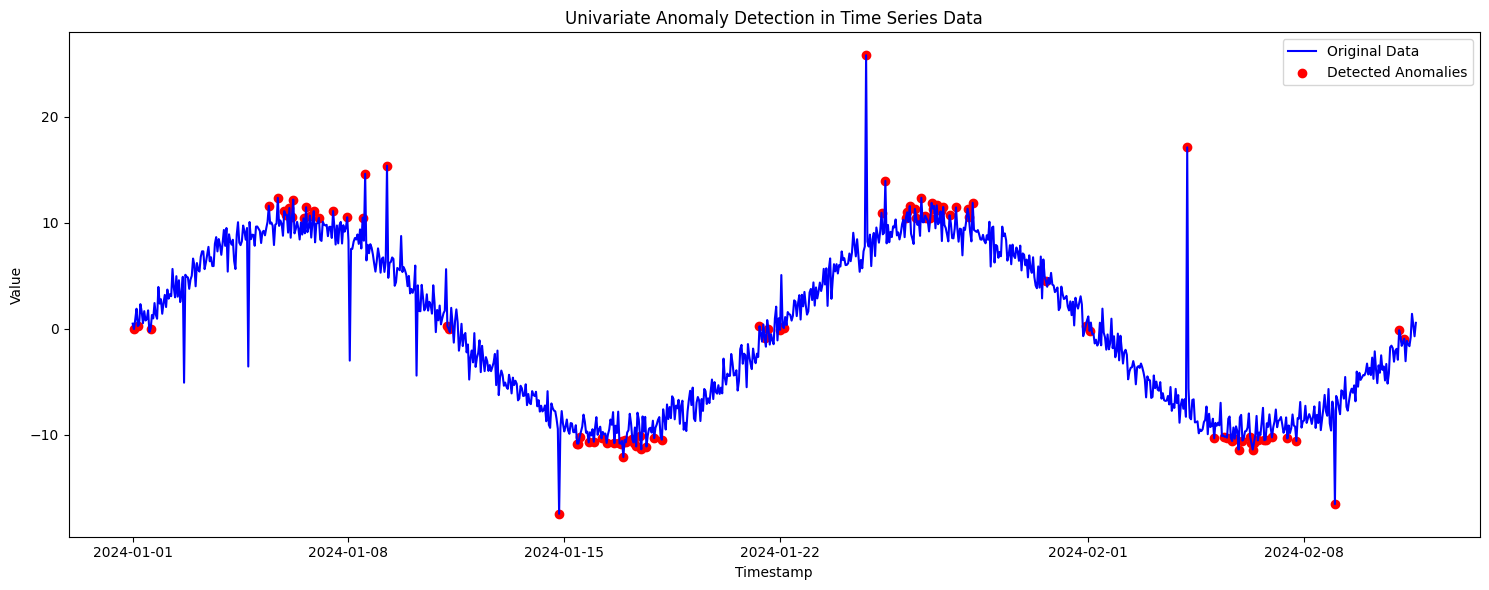


Multivariate Anomaly Detection Example:


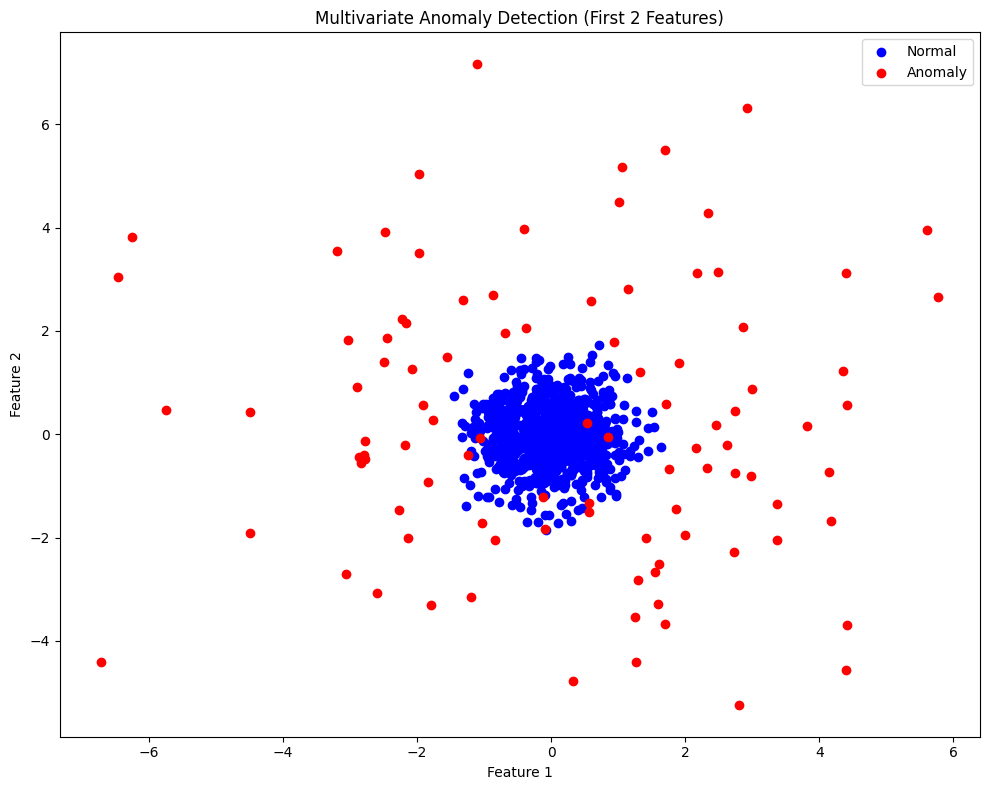

Number of detected anomalies (univariate): 100
Number of detected anomalies (multivariate): 97


In [7]:
if __name__ == "__main__":
    # 1. Univariate Example (Time Series)
    print("Univariate Anomaly Detection Example:")
    ts_data = generate_sample_timeseries()

    # Detect anomalies
    y_pred_uni, y_scores_uni = detect_univariate_anomalies(ts_data['value'].values)

    # Plot results
    plt.figure(figsize=(15, 6))
    plt.plot(ts_data['timestamp'], ts_data['value'], 'b-', label='Original Data')
    plt.scatter(ts_data['timestamp'][y_pred_uni == 1],
               ts_data['value'][y_pred_uni == 1],
               c='red', label='Detected Anomalies')
    plt.title('Univariate Anomaly Detection in Time Series Data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Multivariate Example
    print("\nMultivariate Anomaly Detection Example:")

    # Generate sample multivariate data with outliers
    n_samples = 1000
    n_features = 3

    # Generate synthetic data
    X_train = np.random.randn(n_samples, n_features)
    # Add some outliers
    n_outliers = int(n_samples * 0.1)  # 10% outliers
    outlier_indices = np.random.choice(n_samples, size=n_outliers, replace=False)
    X_train[outlier_indices] = X_train[outlier_indices] * 5  # Make these points outliers

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    # Detect anomalies
    y_pred_multi, y_scores_multi = detect_multivariate_anomalies(X_scaled)

     # Plot results (first two features)
    plt.figure(figsize=(10, 8))
    plt.scatter(X_scaled[y_pred_multi == 0, 0],
               X_scaled[y_pred_multi == 0, 1],
               c='blue', label='Normal')
    plt.scatter(X_scaled[y_pred_multi == 1, 0],
               X_scaled[y_pred_multi == 1, 1],
               c='red', label='Anomaly')
    plt.title('Multivariate Anomaly Detection (First 2 Features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Number of detected anomalies (univariate): {sum(y_pred_uni)}")
    print(f"Number of detected anomalies (multivariate): {sum(y_pred_multi)}")